# Gradient Descent on a Neural Network

- $\textit{Gradient Descent}$ is a general iterative method for solving the problem: 

  $\min_{x \in \mathbb{R}^n} f(x)$, 
  
  where f(x) is some differentiable function. 
  
- $\textit{Neural Networks}$ are powerful function approximators with the following components:
  1. Weights 
  2. Bias
  3. Activation function
  4. Loss function
  
In this module, we train a neural network algorithm using gradient descent.

The following packages are required to run the attached code:

- [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [Numpy](https://numpy.org/doc/)

In [1]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np

---

We generate two random vectors of length 10:

---

In [11]:
dim = 10
X = np.random.rand(dim)
y = np.random.rand(dim)

# The Loss Function

- The $\textit{Loss Function}$ measures the prediction error of the neural net. We will use the Mean Squared Error (MSE), which has the following formula:

  $L(w,b ; x^j) = \frac{1}{2M} \sum_{j=1}^M ( w*x^j + b - y^j )^2$, 

  where M is the number of data points.

- In order to minimize the error, we find: $argmin_{w,b} L(w,b)$. Since this is quadratic (convex), we can proceed with gradient descent. 

- To use gradient decent, we must find the gradient of our loss function, L. 

- We have that: 

  $\frac{\partial L}{\partial w} = \frac{1}{M} \sum_{j=1}^M (w*x^j + b - y^j)x^j$

  $\frac{\partial L}{\partial b} = \frac{1}{M} \sum_{j=1}^M w*x^j + b - y^j$

  Therefore: $\nabla L(w,b) = [\frac{\partial L}{\partial w} ; \frac{\partial L}{\partial b}]$


In [16]:
# we use the formulas above to define our loss and gradient functions

def Loss(X,y,w,b):
    M = len(y)
    MSE_loss = (1/M)*sum(0.5*(x*w + b - y[i])**2 for i,x in enumerate(X))
    return MSE_loss

def gradL(X,y,w,b):
    M = len(y)
    partial_w = (1/M)*sum((x*w + b - y[i])*x for i,x in enumerate(X))
    partial_b = (1/M)*sum((x*w + b - y[i]) for i,x in enumerate(X))
    return partial_w, partial_b

# The Gradient Descent Algorithm:

 - choose a step size, $\alpha$ (we use 0.02 for this project), and set the maximum number of iterations
 - initialize iter = 0
 - randomly choose w and b
 - while iter < maxiter do:
    1. $w = w - \alpha \frac{\partial L}{\partial w}$
    2. $b = b - \alpha \frac{\partial L}{\partial b}$
    3. $iter = iter + 1$

Loss at iter10=0.15136630310806126
Loss at iter50=0.05717462179288196
Loss at iter100=0.04385252366843487
Loss at iter500=0.038323263626854454


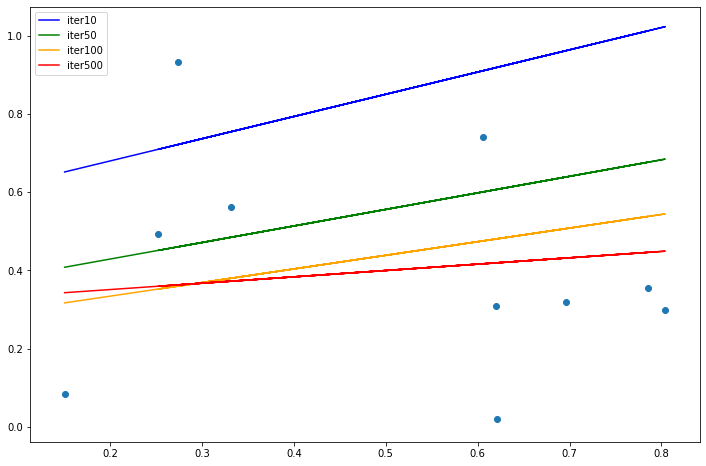

In [15]:
# implementing the algorithm

alpha = 0.02
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

plt.figure(figsize=(12,8))
plt.scatter(X,y)

# want to check on progress at iters 10, 50, 100, 500
colors = {10:'blue', 50:'green', 100:'orange', 500:'red'}
for i in range(501):
    dw,db = gradL(X,y,w,b)
    w = w - alpha*dw
    b = b - alpha*db
    L = Loss(X,y,w,b)
    if i in [10,50,100,500]:
        print(f'Loss at iter{i}={L}')
        plt.plot(X,[w*x + b for x in np.array(X)],
        label = f'iter{i}',
        color = colors[i])
plt.legend()
plt.show()

---

Observe that the lines cluster closer together as the number of iterations increases, which indicates the algorithm is converging. Furthermore, the lines get closer to all of the data points as the number of iterations increases, which indicates our algorithm is working correctly!

---